In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:
ravdess_data = pd.read_csv('ravdess.csv')
# crema_data = pd.read_csv('crema.csv')
# dataset1 = pd.DataFrame(ravdess_data)
# dataset2 = pd.DataFrame(crema_data)
# dataset = pd.concat([dataset1, dataset2], ignore_index = True)
dataset = pd.DataFrame(ravdess_data)


In [10]:
dataset = dataset[dataset.emotion != 'neutral']
dataset = dataset[dataset.emotion != 'calm']
dataset = dataset[dataset.emotion != 'surprised']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 36 to 4295
Columns: 164 entries, Unnamed: 0 to emotion
dtypes: float64(162), int64(1), object(1)
memory usage: 3.6+ MB


In [11]:
#dataset = dataset.iloc[1:,:]
target = dataset.iloc[:,-1:]
features = dataset.iloc[:,:-1]
print(target.head())

   emotion
36   happy
37   happy
38   happy
39   happy
40   happy


In [69]:
np.shape(target)
target = np.ravel(target)
np.shape(target)

emotions = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad','surprised']

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(emotions)
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_name_mapping)
#target = le.fit_transform(target)
#print(le.classes_)
#print(target[:10])

In [70]:
pd.value_counts(target)

happy      576
sad        576
angry      576
fearful    576
disgust    576
dtype: int64

## Feature Comparison
1. RMS

In [38]:
import librosa
import soundfile
import os, glob, pickle, sys
import numpy as np
import pandas as pd
import librosa.display

In [39]:
sad, sad_sr  = librosa.load("Sad.wav")
happy, happy_sr = librosa.load("Happy.wav")

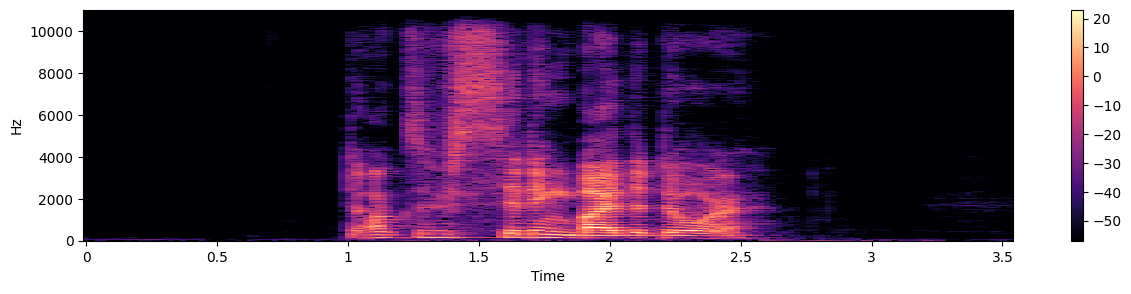

In [40]:
x, sr = librosa.load('Sad.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

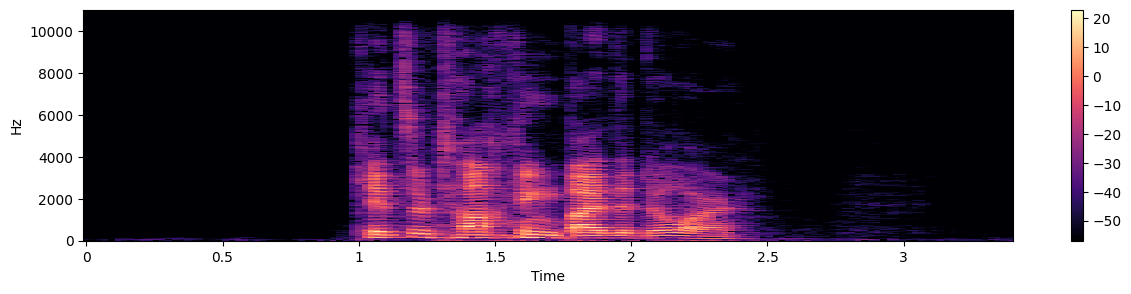

In [41]:
x, sr = librosa.load('Happy.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

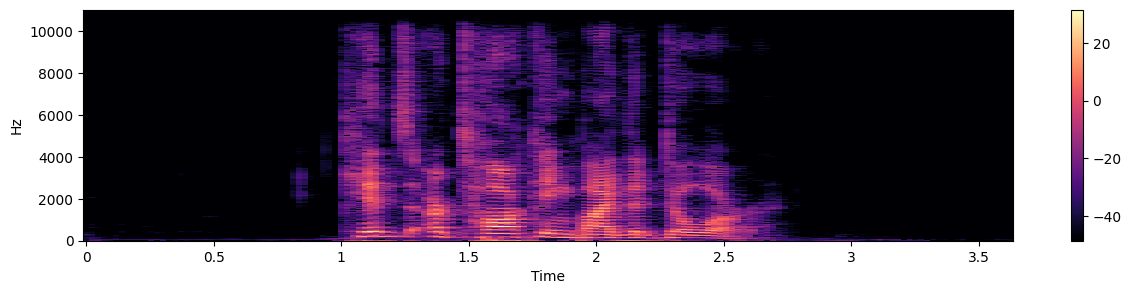

In [42]:
x, sr = librosa.load('angry.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

[Text(0.5, 1.0, 'log Power spectrogram')]

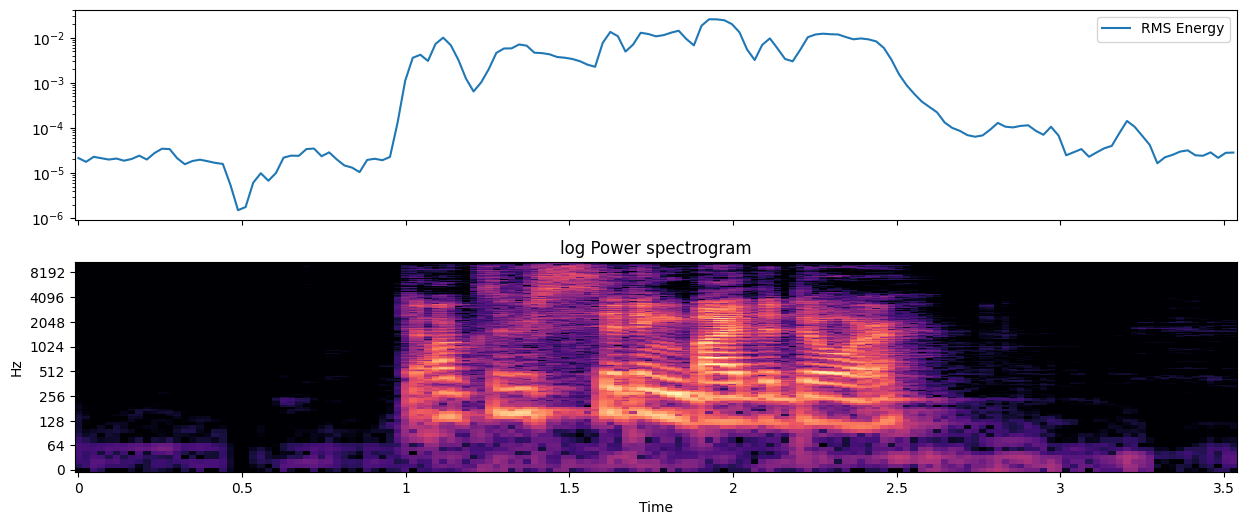

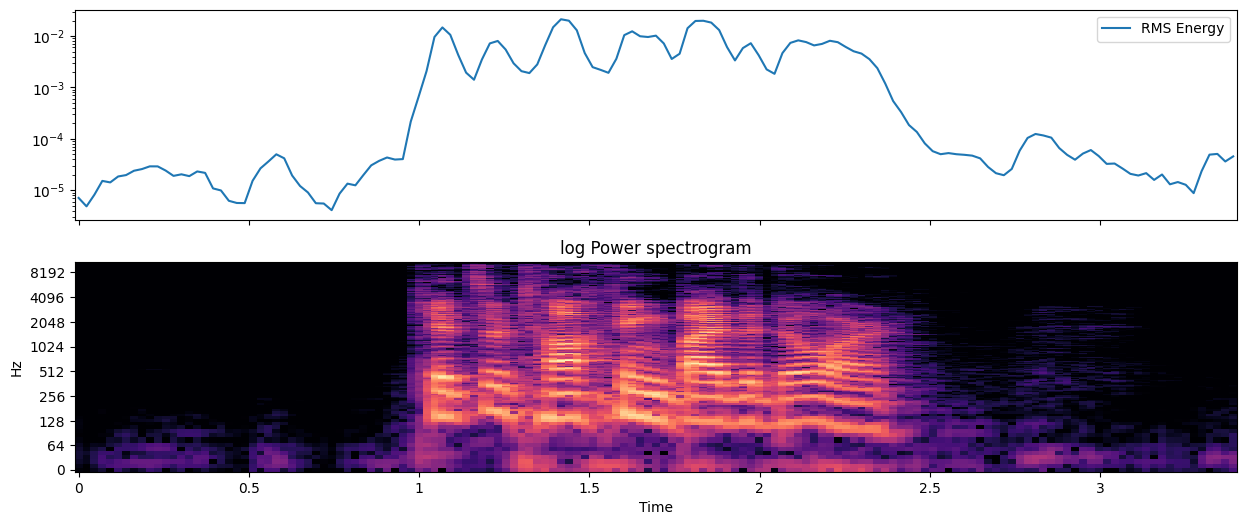

In [43]:
S, phase = librosa.magphase(librosa.stft(sad))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(figsize=(15,6),nrows=2,sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

S, phase = librosa.magphase(librosa.stft(happy))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(figsize=(15,6),nrows=2,sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## SVM

In [72]:
svm_model = SVC(C=1,kernel='poly',gamma=1)
svm_model.fit(X_train,Y_train)

SVC(C=1, gamma=1, kernel='poly')

In [73]:
prediction = svm_model.predict(X_test)

print("Accuracy:%.3f" % accuracy_score(Y_test,prediction))
print("Precision:%.3f" % precision_score(Y_test,prediction,average='micro'))
print("Recall:%.3f" % recall_score(Y_test,prediction,average='micro'))
print("F1:%.3f" % f1_score(Y_test,prediction,average='micro'))

Accuracy:0.776
Precision:0.776
Recall:0.776
F1:0.776


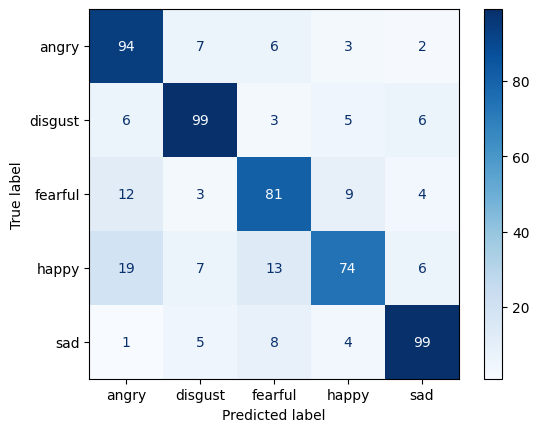

In [74]:
ConfusionMatrixDisplay.from_predictions(Y_test,prediction,cmap='Blues')

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf=RandomForestClassifier(n_estimators=100)

In [77]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [78]:
prediction=clf.predict(X_test)
print("Accuracy:%.3f" % accuracy_score(Y_test,prediction))
print("Precision:%.3f" % precision_score(Y_test,prediction,average='micro'))
print("Recall:%.3f" % recall_score(Y_test,prediction,average='micro'))
print("F1:%.3f" % f1_score(Y_test,prediction,average='micro'))

Accuracy:0.722
Precision:0.722
Recall:0.722
F1:0.722


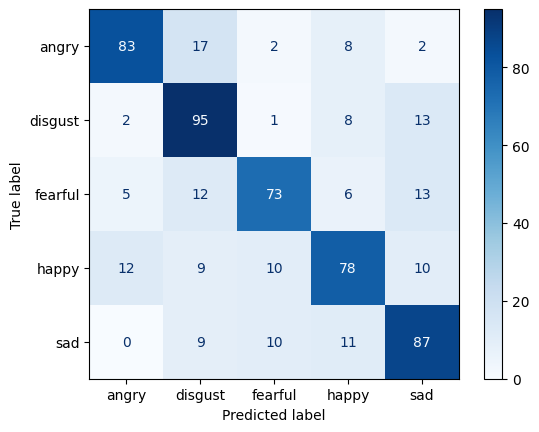

In [79]:
ConfusionMatrixDisplay.from_predictions(Y_test,prediction,cmap='Blues')

## MLP

In [80]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
Model.fit(X_train,np.ravel(Y_train))
prediction=Model.predict(X_test)

print("Accuracy:%.3f" % accuracy_score(Y_test,prediction))
print("Precision:%.3f" % precision_score(Y_test,prediction,average='micro'))
print("Recall:%.3f" % recall_score(Y_test,prediction,average='micro'))
print("F1:%.3f" % f1_score(Y_test,prediction,average='micro'))

Accuracy:0.819
Precision:0.819
Recall:0.819
F1:0.819


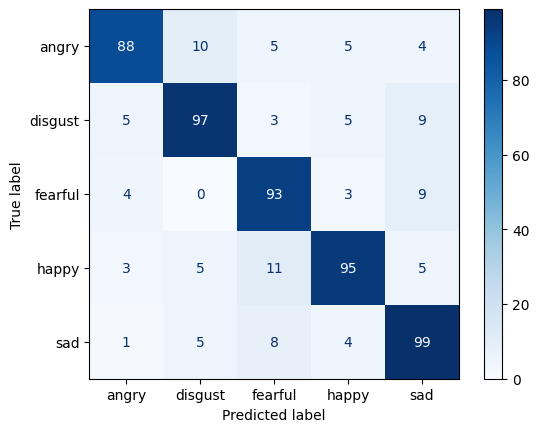

In [81]:
ConfusionMatrixDisplay.from_predictions(Y_test,prediction,cmap='Blues')

## CNN


In [16]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras import regularizers

In [83]:
enc = OneHotEncoder()
Y_train_encoded = enc.fit_transform(Y_train.reshape(-1,1)).todense()
Y_test_encoded = enc.transform(Y_test.reshape(-1,1)).todense()

X_train.shape, Y_train_encoded.shape, X_test.shape, Y_test_encoded.shape

((2304, 163), (2304, 5), (576, 163), (576, 5))

In [84]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 163, 256)          1536      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 82, 256)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 82, 256)           327936    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 21, 128)         

In [85]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(X_train, Y_train_encoded, batch_size=64, epochs=10, validation_data=(X_test, Y_test_encoded), callbacks=[rlrp])

Epoch 1/10
36/36 [==============================] - 14s 323ms/step - loss: 3.5592 - accuracy: 0.3134 - val_loss: 2.1402 - val_accuracy: 0.3142 - lr: 0.0010
Epoch 2/10
36/36 [==============================] - 10s 287ms/step - loss: 1.7618 - accuracy: 0.3299 - val_loss: 1.6291 - val_accuracy: 0.2899 - lr: 0.0010
Epoch 3/10
36/36 [==============================] - 9s 237ms/step - loss: 1.5276 - accuracy: 0.3424 - val_loss: 1.5698 - val_accuracy: 0.3247 - lr: 0.0010
Epoch 4/10
36/36 [==============================] - 8s 223ms/step - loss: 1.4997 - accuracy: 0.3481 - val_loss: 1.5046 - val_accuracy: 0.3212 - lr: 0.0010
Epoch 5/10
36/36 [==============================] - 8s 213ms/step - loss: 1.4740 - accuracy: 0.3724 - val_loss: 1.5104 - val_accuracy: 0.3576 - lr: 0.0010
Epoch 6/10
36/36 [==============================] - 7s 206ms/step - loss: 1.4570 - accuracy: 0.3624 - val_loss: 1.4943 - val_accuracy: 0.3264 - lr: 0.0010
Epoch 7/10
36/36 [==============================] - 10s 271ms/step -

In [90]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test_encoded)[1]*100 , "%")

18/18 [==============================] - 1s 28ms/step - loss: 1.4418 - accuracy: 0.3958
Accuracy of our model on test data :  39.58333432674408 %


18/18 [==============================] - 1s 29ms/step


C:\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


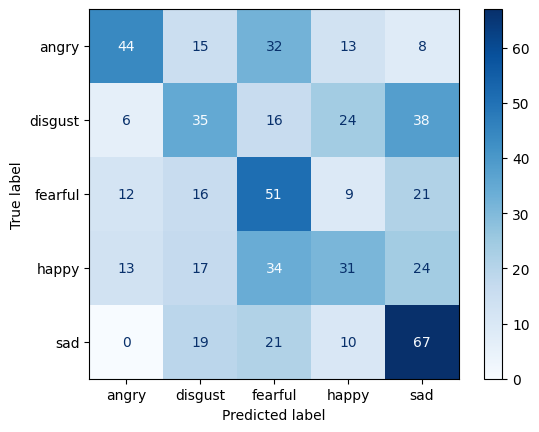

In [87]:


prediction = model.predict(X_test)
y_pred = enc.inverse_transform(prediction)
y_test_transformed = enc.inverse_transform(Y_test_encoded)
ConfusionMatrixDisplay.from_predictions(y_test_transformed,y_pred,cmap='Blues')

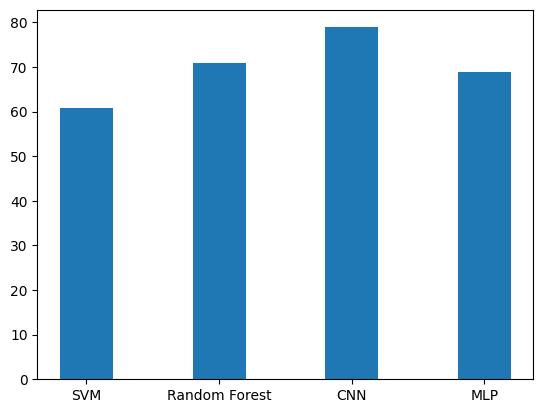

In [88]:
plt.bar(["SVM","Random Forest","CNN","MLP"],[60.7,71,78.9,68.90],width=0.4)
plt.show()

In [89]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [18]:
import tensorflow as tf
model = keras.models.load_model("total_model.sav")

In [22]:
model.predict(X_test)

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 58, 1), found shape=(32, 163)
